## Load and split data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('data.csv', ',')
df.drop('id', axis=1, inplace=True)
df.drop('ALUNO', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
y = df['EVASAO']
X = df.drop('EVASAO', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Find best K to train KNN Model

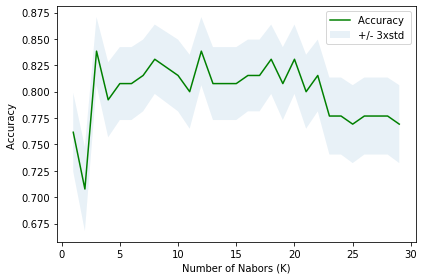

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from sklearn import metrics
Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

## Train with the best K

In [3]:
k = 12
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model = knn_model.fit(X_train, y_train)

## Evaluate model

Accuracy:  0.8384615384615385


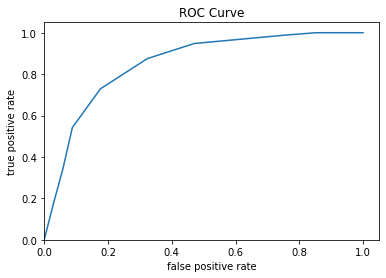

In [4]:
from sklearn import metrics
y_pred = knn_model.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_scores = knn_model.predict_proba(X_test)
false_positive, true_positive, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(false_positive, true_positive)
plt.plot(false_positive, true_positive)
plt.title('ROC Curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)
plt.show()

## Save model

In [5]:
import joblib
filename = 'knn.sav'
joblib.dump(knn_model, filename)
print('saved')

saved
